In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [3]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [4]:
df = rcr('adult.csv')
p(df)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
pd.options.display.max_info_columns = 999
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
list(df.race.unique())

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

In [7]:
p(df)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df_marital_status_education = df.groupby(['marital-status', 'education']).income.value_counts().unstack().reset_index()
df_marital_status_education

income,marital-status,education,<=50K,>50K
0,Divorced,10th,170.0,2.0
1,Divorced,11th,183.0,9.0
2,Divorced,12th,60.0,3.0
3,Divorced,1st-4th,17.0,NaN
4,Divorced,5th-6th,31.0,NaN
5,Divorced,7th-8th,101.0,NaN
6,Divorced,9th,94.0,4.0
7,Divorced,Assoc-acdm,258.0,22.0
8,Divorced,Assoc-voc,329.0,32.0
9,Divorced,Bachelors,655.0,188.0


In [9]:
df_marital_status_education.fillna(0, inplace=True)

In [10]:
df_marital_status_education['total'] = df_marital_status_education.loc[:, '<=50K'] + df_marital_status_education.loc[:, '>50K']
df_marital_status_education

income,marital-status,education,<=50K,>50K,total
0,Divorced,10th,170.0,2.0,172.0
1,Divorced,11th,183.0,9.0,192.0
2,Divorced,12th,60.0,3.0,63.0
3,Divorced,1st-4th,17.0,0.0,17.0
4,Divorced,5th-6th,31.0,0.0,31.0
5,Divorced,7th-8th,101.0,0.0,101.0
6,Divorced,9th,94.0,4.0,98.0
7,Divorced,Assoc-acdm,258.0,22.0,280.0
8,Divorced,Assoc-voc,329.0,32.0,361.0
9,Divorced,Bachelors,655.0,188.0,843.0


In [11]:
df_marital_status_education['<=50K_rate'] = df_marital_status_education.loc[:, '<=50K'] / df_marital_status_education.loc[:, 'total']
df_marital_status_education

income,marital-status,education,<=50K,>50K,total,<=50K_rate
0,Divorced,10th,170.0,2.0,172.0,0.988372
1,Divorced,11th,183.0,9.0,192.0,0.953125
2,Divorced,12th,60.0,3.0,63.0,0.952381
3,Divorced,1st-4th,17.0,0.0,17.0,1.000000
4,Divorced,5th-6th,31.0,0.0,31.0,1.000000
5,Divorced,7th-8th,101.0,0.0,101.0,1.000000
6,Divorced,9th,94.0,4.0,98.0,0.959184
7,Divorced,Assoc-acdm,258.0,22.0,280.0,0.921429
8,Divorced,Assoc-voc,329.0,32.0,361.0,0.911357
9,Divorced,Bachelors,655.0,188.0,843.0,0.776987


In [12]:
df_marital_status_education['>50K_rate'] = df_marital_status_education.loc[:, '>50K'] / df_marital_status_education.loc[:, 'total']
df_marital_status_education

income,marital-status,education,<=50K,>50K,total,<=50K_rate,>50K_rate
0,Divorced,10th,170.0,2.0,172.0,0.988372,0.011628
1,Divorced,11th,183.0,9.0,192.0,0.953125,0.046875
2,Divorced,12th,60.0,3.0,63.0,0.952381,0.047619
3,Divorced,1st-4th,17.0,0.0,17.0,1.000000,0.000000
4,Divorced,5th-6th,31.0,0.0,31.0,1.000000,0.000000
5,Divorced,7th-8th,101.0,0.0,101.0,1.000000,0.000000
6,Divorced,9th,94.0,4.0,98.0,0.959184,0.040816
7,Divorced,Assoc-acdm,258.0,22.0,280.0,0.921429,0.078571
8,Divorced,Assoc-voc,329.0,32.0,361.0,0.911357,0.088643
9,Divorced,Bachelors,655.0,188.0,843.0,0.776987,0.223013


In [13]:
df_marital_status_education.sort_values('total', inplace=True, ascending=False)

In [14]:
df_marital_status_education.reset_index(drop=True, inplace=True)

In [15]:
df_marital_status_education

income,marital-status,education,<=50K,>50K,total,<=50K_rate,>50K_rate
0,Married-civ-spouse,HS-grad,4993.0,2250.0,7243.0,0.689355,0.310645
1,Never-married,HS-grad,4600.0,71.0,4671.0,0.984800,0.015200
2,Never-married,Some-college,4366.0,87.0,4453.0,0.980463,0.019537
3,Married-civ-spouse,Some-college,2356.0,1823.0,4179.0,0.563771,0.436229
4,Married-civ-spouse,Bachelors,1356.0,2780.0,4136.0,0.327853,0.672147
5,Never-married,Bachelors,2418.0,263.0,2681.0,0.901902,0.098098
6,Divorced,HS-grad,2299.0,117.0,2416.0,0.951573,0.048427
7,Divorced,Some-college,1457.0,103.0,1560.0,0.933974,0.066026
8,Married-civ-spouse,Masters,359.0,1168.0,1527.0,0.235102,0.764898
9,Married-civ-spouse,Assoc-voc,558.0,455.0,1013.0,0.550839,0.449161


In [16]:
df_education_num_education = df.loc[:, ['educational-num', 'education']].drop_duplicates()
df_education_num_education = df_education_num_education.sort_values('educational-num', ascending=False).reset_index(drop=True)
df_education_num_education

,educational-num,education
0,16,Doctorate
1,15,Prof-school
2,14,Masters
3,13,Bachelors
4,12,Assoc-acdm
5,11,Assoc-voc
6,10,Some-college
7,9,HS-grad
8,8,12th
9,7,11th


In [17]:
df_marital_status_education = pd.merge(df_education_num_education, df_marital_status_education, on='education')
df_marital_status_education

,educational-num,education,marital-status,<=50K,>50K,total,<=50K_rate,>50K_rate
0,16,Doctorate,Married-civ-spouse,71.0,332.0,403.0,0.176179,0.823821
1,16,Doctorate,Never-married,54.0,43.0,97.0,0.556701,0.443299
2,16,Doctorate,Divorced,21.0,35.0,56.0,0.375000,0.625000
3,16,Doctorate,Married-spouse-absent,6.0,7.0,13.0,0.461538,0.538462
4,16,Doctorate,Widowed,5.0,8.0,13.0,0.384615,0.615385
5,16,Doctorate,Separated,6.0,5.0,11.0,0.545455,0.454545
6,16,Doctorate,Married-AF-spouse,0.0,1.0,1.0,0.000000,1.000000
7,15,Prof-school,Married-civ-spouse,92.0,504.0,596.0,0.154362,0.845638
8,15,Prof-school,Never-married,79.0,60.0,139.0,0.568345,0.431655
9,15,Prof-school,Divorced,35.0,39.0,74.0,0.472973,0.527027


In [18]:
df_marital_status_education = df_marital_status_education.sort_values(['marital-status', 'educational-num'])
df_marital_status_education

,educational-num,education,marital-status,<=50K,>50K,total,<=50K_rate,>50K_rate
103,1,Preschool,Divorced,2.0,0.0,2.0,1.000000,0.000000
96,2,1st-4th,Divorced,17.0,0.0,17.0,1.000000,0.000000
89,3,5th-6th,Divorced,31.0,0.0,31.0,1.000000,0.000000
82,4,7th-8th,Divorced,101.0,0.0,101.0,1.000000,0.000000
76,5,9th,Divorced,94.0,4.0,98.0,0.959184,0.040816
69,6,10th,Divorced,170.0,2.0,172.0,0.988372,0.011628
63,7,11th,Divorced,183.0,9.0,192.0,0.953125,0.046875
57,8,12th,Divorced,60.0,3.0,63.0,0.952381,0.047619
50,9,HS-grad,Divorced,2299.0,117.0,2416.0,0.951573,0.048427
43,10,Some-college,Divorced,1457.0,103.0,1560.0,0.933974,0.066026


C:\Users\Paul\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


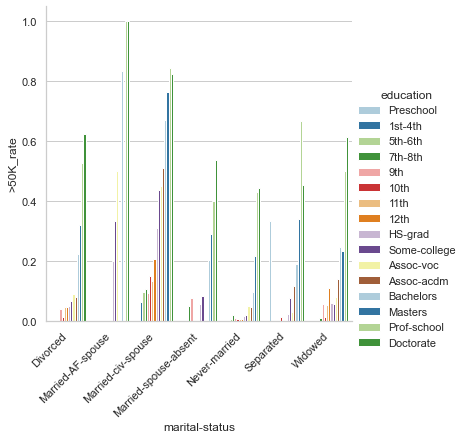

In [34]:
sns.color_palette("rocket_r", as_cmap=True)

sns.factorplot(x='marital-status',
               y='>50K_rate',
               hue='education',
               data=df_marital_status_education,
               kind='bar',
               palette="Paired")

plt.tick_params(axis='x', rotation=45)

plt.xticks(ha="right")

plt.tick_params(bottom=False)

plt.tick_params(left=False)


#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots

<font color='blue'> the general trend is with more advanced levels in education, there is an increased likelihood of a >50K annual income across all marital status'</font>

<font color='blue'> among individual marital status', a married civilian spouse generally indicates a higher probability of an >50K income regardless of education. </font>

<font color='red'> what 10 eduational categories are most relevant here????</font>

## 3.6 Summary<a id='3.6_Summary'></a>